<a href="https://colab.research.google.com/github/charlie11438/note/blob/master/python_stats/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 統計分析筆記

## 2019-05-06 basic

## 2019-05-07 process output

In [0]:
#導入模組
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [20]:
#產生亂數資料(常態分配)
np.random.seed(2345)
n1=2.5*np.random.randn(20)*6.25
n2=3.5*np.random.randn(20)*7.25
print(n1)
print(n2)

[-14.86404297  27.63705944 -17.8410458   11.10554484   7.98360375
  17.95358491  -8.41344104 -11.51007946  -1.18744504  13.26277847
  10.15286394  -8.92518249 -14.28372387  -1.92999649   4.40052368
  12.4314367    2.80303774  18.78135697   5.80961638  -4.53255592]
[  9.73311316  15.30038367  -4.85448747 -51.06034814  -8.23154233
   6.20537342   0.43727906   3.27157155 -36.184515     5.22048131
  -4.62917501  41.53613522  -5.97491042 -47.31497455  70.65928947
 -25.31994047 -29.11741374  36.9981335    3.62539868   3.5094751 ]


In [0]:
#產生DataFrame
original=pd.DataFrame()
original['sample1']=n1
original['sample2']=n2

In [22]:
print(original.head())

     sample1    sample2
0 -14.864043   9.733113
1  27.637059  15.300384
2 -17.841046  -4.854487
3  11.105545 -51.060348
4   7.983604  -8.231542


# 敘述性統計

In [0]:
des=pd.DataFrame(stats.describe(original.loc[:,'sample1']))
i=['n','Min-Max','Mean','Variance','skewness','kurtosis']
des.index=i
des=des.rename(columns={0:'sample1'})

In [0]:
sam2des=np.array(stats.describe(original.loc[:,'sample2']))
des['sample2']=sam2des

In [28]:
des

,sample1,sample2
n,20,20
Min-Max,"(-17.84104580006565, 27.6370594414682)","(-51.0603481355165, 70.65928946564321)"
Mean,2.44169,-0.809534
Variance,160.688,857.75
skewness,0.0937944,0.411339
kurtosis,-0.908775,0.393051


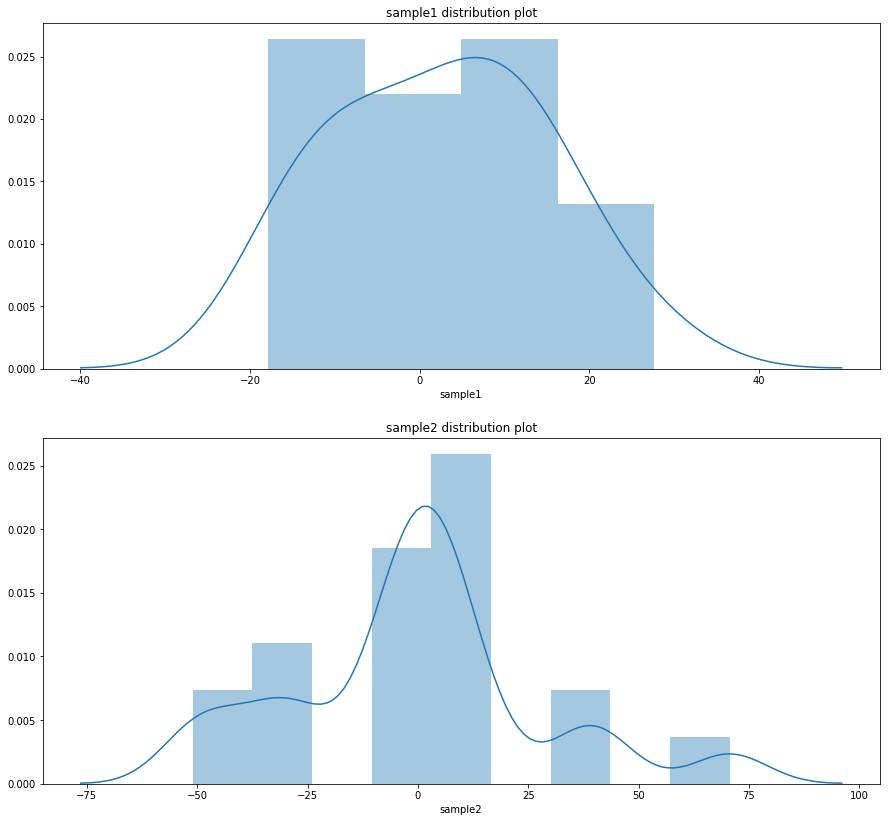

In [29]:
z0=plt.figure(figsize=(15,14))
z0.add_subplot(2,1,1)
sns.distplot(original.loc[:,'sample1'])
plt.title('sample1 distribution plot')
z0.add_subplot(2,1,2)
sns.distplot(original.loc[:,'sample2'])
plt.title('sample2 distribution plot')
plt.show()

# 敘述性統計

兩者皆為右偏,近似常態分配

sample1為低闊峰,sample2為高峽峰

sample2變異程度大於sample1


# 信賴區間

stats.sem 計算標準誤

stats.t.interval 計算95%信賴區間

stats.t.interval(信賴係數,自由度,mean,se(x))

20為小樣本,使用t分配

In [46]:
print('sample1 95%信賴區間')
stats.t.interval(0.95,original.index.shape[0]-1,loc=original.loc[:,'sample1'].mean(),scale=stats.sem(original.loc[:,'sample1']))

sample1 95%信賴區間


(-3.490993653520516, 8.374383027390223)

In [47]:
print('sample2 95%信賴區間')
stats.t.interval(0.95,original.index.shape[0]-1,loc=original.loc[:,'sample2'].mean(),scale=stats.sem(original.loc[:,'sample2']))

sample2 95%信賴區間


(-14.516445144719457, 12.897377845850416)

# 假說檢定

設sample1群體平均數為mu1,sample2群體平均數為mu2



H0:mu1=mu2



H1:mu1!=mu2



並設定alpha風險控制於0.05



scipy的ttest_ind為雙尾檢定,檢測兩群體間的差異(假設兩群體為獨立)



equal_var 預設為True,意指預設假設變異數為相同

In [35]:
hypo=np.array(stats.ttest_ind(original.loc[:,'sample1'],original.loc[:,'sample2']))
hypodf=pd.DataFrame()
hypodf['value']=hypo
i=['statistic','p-value']
hypodf.index=i
hypodf

,value
statistic,0.455612
p-value,0.651262


# 假說檢定

p-value 為 0.265,大於0.05,顯著

因此不棄卻H0

## one-way Anova

### 單因子變異數分析


檢測虛無假說群體間群體平均數無差異


H0:mu1=mu2=mu3


H1:mu1!=mu2!=mu3


alpha風險控制於0.05

In [36]:
n3=4.5*np.random.randn(20)*8.25
original['sample3']=n3
original.head()

,sample1,sample2,sample3
0,-14.864043,9.733113,51.141223
1,27.637059,15.300384,-60.869890
2,-17.841046,-4.854487,35.190323
3,11.105545,-51.060348,-72.567043
4,7.983604,-8.231542,12.845469


In [37]:
sam3des=np.array(stats.describe(original.loc[:,'sample3']))
des['sample3']=sam3des
des

,sample1,sample2,sample3
n,20,20,20
Min-Max,"(-17.84104580006565, 27.6370594414682)","(-51.0603481355165, 70.65928946564321)","(-72.56704293102538, 51.14122304728958)"
Mean,2.44169,-0.809534,-12.8157
Variance,160.688,857.75,1420.53
skewness,0.0937944,0.411339,0.192931
kurtosis,-0.908775,0.393051,-1.09866


In [48]:
print('sample3 95%信賴區間')
stats.t.interval(0.95,original.index.shape[0]-1,loc=original.loc[:,'sample3'].mean(),scale=stats.sem(original.loc[:,'sample3']))

sample3 95%信賴區間


(-30.45513345992947, 4.823705242819598)

In [44]:
owanova=np.array(stats.f_oneway(original.loc[:,'sample1'],original.loc[:,'sample2'],original.loc[:,'sample3']))
OneWay=pd.DataFrame()
OneWay['value']=owanova
OneWay.index=['statistics','p-value']
OneWay

,value
statistics,1.588817
p-value,0.213075


## One-way anova

p-value>0.05,不棄卻H0假說

即群體平均數無明顯差異